# AND NN

In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[0],[0],[1]])

input_size=2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real
#La variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,output_layer_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer1")

y = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico
#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(10000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

Instructions for updating:
Use `tf.global_variables_initializer` instead.
1.0


Visualicemos la frontera de decision

1.53114 1.53116 -1.00001


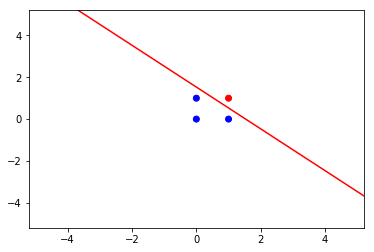

In [5]:
w=[
    sess.run(b_layer1, feed_dict={x: X, y_: Y})[0]]+[i[0] 
    for i in sess.run(W_layer1, feed_dict={x: X, y_: Y})
]

m=((w[0]/w[2]))/((-w[0]/w[1]))
print -w[0]/w[1], -w[0]/w[2], m

plt.scatter(X[:,0],X[:,1],c=['red' if i==1 else 'blue' for i in Y])
x2 = np.linspace(-5.2,5.2,100) # 100 numeros espaciados
plt.plot(x2,-w[0]/w[2]+m*x2,color='red')
plt.ylim([-5.2,5.2])
plt.xlim([-5.2,5.2])
# plt.show()
sess.close()


# XOR NN

In [6]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

input_size=2
middle_size = 2
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real

#Las variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")

W_layer2 = tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer2")

hidden_1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
y = tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2)
lossfn = tf.reduce_mean(tf.reduce_sum((y_-y)**2)) #cuadratico

train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

#imprimir alguna variable
print(sess.run(y, feed_dict={x:[[0.8,0.5]]}))
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))

correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

Instructions for updating:
Use `tf.global_variables_initializer` instead.
[[ 0.06983094]]
[[ 5.55987215  5.53049994]
 [-5.36990547 -5.65934658]]
1.0


Decision Boundaries

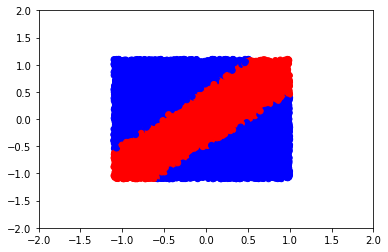

In [7]:
# Genero datos para tener una idea visual del Decision boundary
x_1 = [
    np.random.uniform(-1.1,1.1)
    for iter in range(0,10000)
]

x_2 = [
    np.random.uniform(-1.1,1)
    for iter in range(0,10000)
]

X=np.asarray([[x_1[i], x_2[i]] for i in range(len(x_1))])

prediction = sess.run(y,feed_dict={x:X})

plt.scatter(x_2, x_1, c=['red' if i < 0.5 else 'blue' for i in prediction])
plt.ylim([-2,2])
plt.xlim([-2,2])

plt.show()

sess.close()

# Unit Circle  NN

In [8]:
x_1 = [
    np.random.uniform(-1.25,1.25)
    for iter in range(0,10000)
]

x_2 = [
    np.random.uniform(-1.25,1.25)
    for iter in range(0,10000)
]

x_3 = [x_1[i]**2 for i in range(len(x_1))]

x_4 = [x_2[i]**2 for i in range(len(x_1))]

y = [(x_3[i] + x_4[i]) <= 1 for i in range(len(x_1))]

# plt.scatter(x_2, x_1, c=['red' if i else 'blue' for i in y])
# plt.ylim([-2,2])
# plt.xlim([-2,2])

# plt.show()

# Training set para la RN

X=np.asarray([[x_1[i], x_2[i], x_3[i], x_4[i]] for i in range(len(x_1))])
Y=np.asarray([[elem] for elem in y])

input_size=4
middle_size=4
output_layer_size=1
#Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer_size]) #la y real

#Las variables para lo que se va a ir calculando y modificando en el camino
W_layer1=tf.Variable(tf.random_uniform([input_size,middle_size], -1, 1), name="W_layer1")
b_layer1 = tf.Variable(tf.zeros([middle_size]), name="b_layer1")

W_layer2 = tf.Variable(tf.random_uniform([middle_size,middle_size], -1, 1), name="W_layer2")
b_layer2 = tf.Variable(tf.zeros([middle_size]), name="b_layer2")

W_layer3 = tf.Variable(tf.random_uniform([middle_size,middle_size], -1, 1), name="W_layer3")
b_layer3 = tf.Variable(tf.zeros([middle_size]), name="b_layer3")

W_layer4 = tf.Variable(tf.random_uniform([middle_size,output_layer_size], -1, 1), name="W_layer4")
b_layer4 = tf.Variable(tf.zeros([output_layer_size]), name="b_layer4")

hidden_1 = tf.nn.sigmoid(tf.matmul(x,W_layer1)+b_layer1) #la de nuestra
hidden_2 = tf.nn.sigmoid(tf.matmul(hidden_1,W_layer2)+b_layer2)
hidden_3 = tf.nn.sigmoid(tf.matmul(hidden_2,W_layer3)+b_layer3)
y = tf.nn.sigmoid(tf.matmul(hidden_3,W_layer4)+b_layer4)
lossfn = tf.reduce_mean(( (y_ * tf.log(y)) + ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy

#lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
 # ((1 - y_) * tf.log(1.0 - y)) ) * -1) # cross entropy
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(lossfn)

init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva

sess.run(init)
for i in range(100000):
    sess.run(train_step, feed_dict={x: X, y_: Y})

correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos


Instructions for updating:
Use `tf.global_variables_initializer` instead.
0.9997


Decision Boundaries

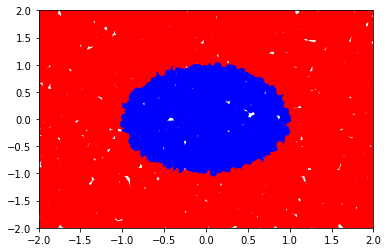

In [9]:
# vizualising Decision boundaries
x_1 = [
    np.random.uniform(-2,2)
    for iter in range(0,10000)
]

x_2 = [
    np.random.uniform(-2,2)
    for iter in range(0,10000)
]

x_3 = [x_1[i]**2 for i in range(len(x_1))]

x_4 = [x_2[i]**2 for i in range(len(x_1))]

X=np.asarray([[x_1[i], x_2[i], x_3[i], x_4[i]] for i in range(len(x_1))])

# para visualizar el Decision boundary evaluo en la primera capa y despues en la siguiente

prediction = sess.run(y,feed_dict={x:X})

plt.scatter(x_2, x_1, c=['red' if i < 0.5 else 'blue' for i in prediction])
plt.ylim([-2,2])
plt.xlim([-2,2])

plt.show()